# Project: Wrangling and Analyze Data (WeRateDogs @dog_Rates )

## Table of Contents
* Introduction
* Data Gathering 
 * Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
 * Use the Requests library to download the tweet image prediction (image_predictions.tsv)
 * Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
* Assessing Data
 * Visual assessment
 * Programmatic assessement
 * Quality issues
 * Tidiness issues
* Cleaning Data
* Storing Data
* Analyzing and Visualizing Data
 * Insights
 * Visualization

## Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

In [114]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sb
import json 

%matplotlib inline


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [6]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

In [ ]:
count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:

    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer 

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
twitter_list = []

with open('tweet_json.txt') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id_str']
        favorite_count = json_data['favorite_count']
        retweet_count = json_data['retweet_count']
        twitter_list.append({'tweet_id': tweet_id,
                        'favorite_count': favorite_count,
                        'retweet_count': retweet_count})

df3 = pd.DataFrame(twitter_list, columns = ['tweet_id','favorite_count', 'retweet_count'])
df3.head()


,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



**Visual assessment**

In [9]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
df3

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


**Programmatic assessement**

#### Dataframe 1

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
1483,693262851218264065,NaN,NaN,2016-01-30 02:41:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope you guys enjoy this beautiful snowy pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693262851...,11,10,None,None,None,pupper,None


In [14]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
sum(df.duplicated())

0

In [16]:
df['doggo'].isnull().sum()

0

In [17]:
df['floofer'].isnull().sum()

0

In [18]:
df['pupper'].isnull().sum()

0

In [19]:
df['puppo'].isnull().sum()

0

In [20]:
 type(df['timestamp'][0])

str

In [21]:
 type(df['retweeted_status_timestamp'][0])

float

In [22]:
df['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Aldrick       1
Odin          1
Chadrick      1
Pupcasso      1
Barclay       1
Name: name, Length: 957, dtype: int64

In [23]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Dataframe 2

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df2.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
626,680801747103793152,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,1,pug,0.996720,True,Labrador_retriever,0.001439,True,Staffordshire_bullterrier,0.000518,True
236,670428280563085312,https://pbs.twimg.com/media/CU3W9ELWEAEdUA0.jpg,1,chow,0.335269,True,golden_retriever,0.305850,True,Tibetan_mastiff,0.063325,True


In [28]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
sum(df2.duplicated())

0

In [30]:
sum(df2['jpg_url'].duplicated())

66

In [31]:
df2.loc[(df2.p1_dog == False) & (df2.p2_dog == False) & (df2.p3_dog == False)].count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

#### Dataframe 3

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [33]:
df3.sample(2)

,tweet_id,favorite_count,retweet_count
1681,681694085539872773,14010,4581
2271,667470559035432960,273,102


In [34]:
df3.describe()

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


In [35]:
sum(df3.duplicated())

0

In [36]:
 type(df3['tweet_id'][0])

str

### Quality issues
1. timestampin dataframe 1 should be datetime format.                    

2. mistake in name colmun, some of these values is (a, the, an, not, O, very).

3. drop duplicated image (jpg_url) in dataframe 2.

4. change tweet_id data type in dataframe 1 ,2  from int to string, because I will merge all dataframes.

5. rating_denominator in dataframe 1 should be 10.

6. source in dataframe 1 include HTML format.

7. not all image dogs in dataframe 2.
8. drop unnecessary columns

### Tidiness issues
1. The last 4 columns (doggo, floofer, pupper, puppo) in dataframe 1 should be in one column called " dog stages ".

2. Merge all dataframes

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [37]:
# Make copies of original pieces of data
df_1 = df.copy()
df_2 = df2.copy()
df_3 = df3.copy()

#### Define: timestamp in dataframe 1 should be datetime format.

#### Code

In [38]:
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])

#### Test

In [39]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

#### Define: mistake in name colmun, some of these values is ( a, the, an, not, O, very).

#### Code

In [40]:
df_1['name'] = df_1['name'].replace(['a', 'the', 'an','not','O', 'very'],'None')


#### Test

In [41]:
df_1[df_1['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define: drop duplicated image (jpg_url) in dataframe 2.

#### Code

In [42]:
df_2.drop_duplicates(subset=['jpg_url'], inplace= True)

#### Test

In [43]:
sum(df_2['jpg_url'].duplicated())

0

#### Define: change tweet_id data type in dataframe 1 ,2  from int to string, because I will merge all dataframes.


#### Code

In [44]:
df_1['tweet_id'] = df_1['tweet_id'].astype('str')

In [45]:
df_2['tweet_id'] = df_2['tweet_id'].astype('str')

#### Test

In [46]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

In [47]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


#### Define: rating_denominator in dataframe 1 should be 10.

#### Code 

In [48]:
rating_denominator_values = df_1[df_1['rating_denominator'] != 10]

In [49]:
df_1 = df_1.drop(rating_denominator_values.index, axis=0)

#### Test

In [50]:
df_1['rating_denominator'].value_counts()

10    2333
Name: rating_denominator, dtype: int64

#### Define: source in dataframe 1 include HTML format.

#### Code

In [51]:
df_1['source'] = df_1['source'].str.replace(r"<(?:a\b[^>]*>|/a>)", "")

#### Test

In [52]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2256,667766675769573376,NaN,NaN,2015-11-20 18:09:16+00:00,Twitter Web Client,This is Calvin. He is a Luxembourgian Mayo. Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,None,None,None,None
1332,705475953783398401,NaN,NaN,2016-03-03 19:32:29+00:00,Twitter for iPhone,Say hello to Zara. She found a sandal and coul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705475953...,12,10,Zara,None,None,None,None
1928,674045139690631169,NaN,NaN,2015-12-08 01:57:39+00:00,Twitter for iPhone,Herd of wild dogs here. Not sure what they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674045139...,3,10,None,None,None,None,None
1821,676582956622721024,NaN,NaN,2015-12-15 02:02:01+00:00,Twitter for iPhone,Meet Vinnie. He's having fun while being safe....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676582956...,8,10,Vinnie,None,None,None,None
1945,673707060090052608,NaN,NaN,2015-12-07 03:34:14+00:00,Twitter for iPhone,This is Raymond. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673707060...,10,10,Raymond,None,None,pupper,None


#### Define: not all image dogs in dataframe 2.

#### Code

In [53]:
df_2 = df_2.drop(df_2.loc[(df_2.p1_dog == False) & (df_2.p3_dog == False) & (df_2.p2_dog == False)].index, axis = 0)

#### Test 

In [54]:
df_2.loc[(df_2.p1_dog == False) & (df_2.p3_dog == False) & (df_2.p2_dog == False)].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### Define: The last 4 columns (doggo, floofer, pupper, puppo) in dataframe 1 should be in one column called " dog stages "

#### Code

In [55]:
df_1['dog_stages'] = df_1['text'].str.extract('(doggo|floofer|pupper|puppo)')

#### Test

In [56]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
1309,707059547140169728,NaN,NaN,2016-03-08 04:25:07+00:00,Twitter for iPhone,Say hello to Cupcake. She's an Icelandic Dippe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707059547...,11,10,Cupcake,None,None,None,None,NaN
1936,673956914389192708,NaN,NaN,2015-12-07 20:07:04+00:00,Twitter for iPhone,This is one esteemed pupper. Just graduated co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673956914...,10,10,one,None,None,pupper,None,pupper
1073,739932936087216128,NaN,NaN,2016-06-06 21:32:13+00:00,Twitter for iPhone,Say hello to Rorie. She's zen af. Just enjoyin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,None,None,None,None,NaN
476,816014286006976512,NaN,NaN,2017-01-02 20:12:21+00:00,Twitter for iPhone,RT @dog_rates: This is Larry. He has no self c...,7.320056e+17,4.196984e+09,2016-05-16 00:31:53 +0000,https://twitter.com/dog_rates/status/732005617...,11,10,Larry,None,None,None,None,NaN
1370,702321140488925184,NaN,NaN,2016-02-24 02:36:23+00:00,Twitter for iPhone,Please enjoy this picture as much as I did. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702321140...,12,10,None,None,None,None,None,NaN


#### Define: drop unnecessary columns

#### Code

In [57]:
df_1.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

#### Test

In [58]:
list(df_1.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stages']

#### Define: Merge all dataframes

#### Code

In [59]:
twitter_master = pd.concat([df_1, df_2, df_3], join='outer', axis=1)

#### Test

In [60]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2333 non-null object
timestamp             2333 non-null datetime64[ns, UTC]
source                2333 non-null object
text                  2333 non-null object
expanded_urls         2278 non-null object
rating_numerator      2333 non-null float64
rating_denominator    2333 non-null float64
name                  2333 non-null object
dog_stages            392 non-null object
tweet_id              1691 non-null object
jpg_url               1691 non-null object
img_num               1691 non-null float64
p1                    1691 non-null object
p1_conf               1691 non-null float64
p1_dog                1691 non-null object
p2                    1691 non-null object
p2_conf               1691 non-null float64
p2_dog                1691 non-null object
p3                    1691 non-null object
p3_conf               1691 non-null float64
p3_dog         

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
twitter_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [62]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [63]:
df_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,tweet_id.1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id.2,favorite_count,retweet_count
263,8.425356e+17,2017-03-17 00:38:32+00:00,Twitter for iPhone,This is Winnie. She lost her body saving a chi...,https://twitter.com/dog_rates/status/842535590...,13.0,10.0,Winnie,NaN,6.707927e+17,...,False,toy_poodle,0.031355,True,miniature_poodle,0.025743,True,8.421635e+17,26569.0,6568.0
1350,7.041133e+17,2016-02-29 01:17:46+00:00,Twitter for iPhone,Meet Stanley. He's an inverted Uzbekistani wat...,https://twitter.com/dog_rates/status/704113298...,8.0,10.0,Stanley,NaN,7.597934e+17,...,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,7.037742e+17,2020.0,526.0
1215,7.150098e+17,2016-03-30 02:56:24+00:00,Twitter for iPhone,This is Siba. She's remarkably mobile. Very sl...,https://twitter.com/dog_rates/status/715009755...,12.0,10.0,Siba,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.149627e+17,8028.0,4816.0
1256,7.105889e+17,2016-03-17 22:09:38+00:00,Twitter for iPhone,This is Beemo. He's a Chubberflop mix. 12/10 w...,https://twitter.com/dog_rates/status/710588934...,12.0,10.0,Beemo,NaN,7.485689e+17,...,True,toy_poodle,0.304836,True,miniature_poodle,0.070878,True,7.102833e+17,2308.0,580.0
2012,6.722393e+17,2015-12-03 02:21:48+00:00,Twitter for iPhone,This is Ridley. He doesn't know how to couch. ...,https://twitter.com/dog_rates/status/672239279...,7.0,10.0,Ridley,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.722228e+17,833.0,231.0


### Insights and Visualization


**1. What are the most common dog stages?**

Text(0.5, 0, 'Dog Stages')

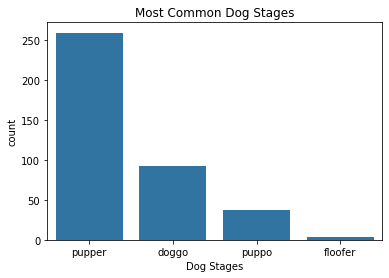

In [79]:
order = df_master['dog_stages'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=df_master, x='dog_stages', color =base_color, order= order)
plt.title('Most Common Dog Stages')
plt.xlabel('Dog Stages')

**observation: the most common dog stages are pupper, after that doggo.**

**2- Do highly rated dogs have a high number of retweets and a favorites count?**

In [117]:
df_master['rating'] = df_master.rating_numerator / df_master.rating_denominator

Text(0, 0.5, 'Retweets Count')

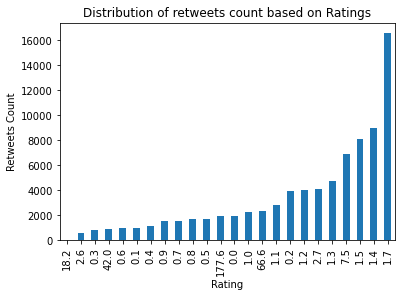

In [118]:
twitter_mean= df_master.groupby('rating')['retweet_count'].mean().sort_values()
twitter_mean.plot(kind='bar')
plt.title('Distribution of retweets count based on Ratings')
plt.xlabel('Rating')
plt.ylabel('Retweets Count')

Text(0, 0.5, 'Retweets Count')

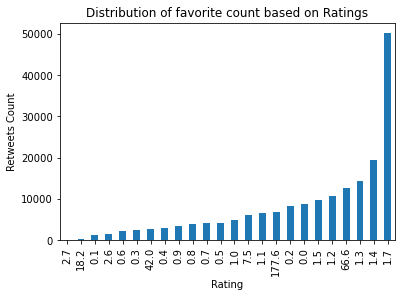

In [119]:
twitter_mean= df_master.groupby('rating')['favorite_count'].mean().sort_values()
twitter_mean.plot(kind='bar')
plt.title('Distribution of favorite count based on Ratings')
plt.xlabel('Rating')
plt.ylabel('Retweets Count')

**observation: the dogs with high ratings have high retweet count and favorite count**

**3- What is the relation between retweet count and favorite count?**

Text(0.5, 1.0, 'Favorite Count vs Retweet Count')

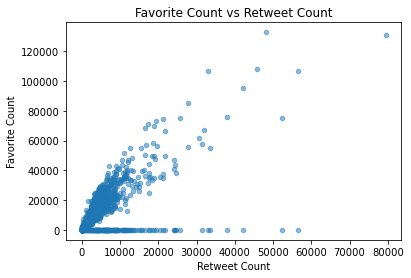

In [120]:
df_master.plot(kind='scatter',x='retweet_count',y='favorite_count', alpha = 0.5)
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Favorite Count vs Retweet Count')

**observation: there is a positive correlation between favorite count and retweet count**